In [1]:
import pickle
with open('data/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

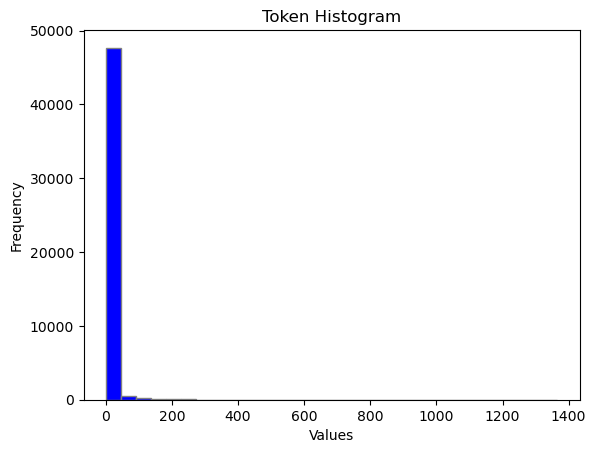

In [2]:
# Q1
import matplotlib.pyplot as plt
import numpy as np
frequencies = list(token_count.values())
plt.hist(frequencies, bins=30, color='blue', edgecolor='gray')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Token Histogram')
plt.show()

# I notice that the data is extremely right skewed, with most of the values falling close to the 0-50 mark.

In [3]:
# Q2
import pandas as pd

df = pd.read_parquet('data/Phishing_clean.parquet')

In [4]:
df.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Q2

def maxmin(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))

# Create target and features
X = df.drop(columns=['Email Type'])
y=df['Email Type']

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=65
)

In [6]:
#Q2
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=False).fit(X_train, y_train)
R2_train=reg.score(X_train, y_train)
R2_test=reg.score(X_test, y_test)

print("R^2 Test:", R2_test)
print("R^2 Train:", R2_train)

R^2 Test: 0.564254253036007
R^2 Train: 0.6963385544591043


In [7]:
# Q2
results=pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results['absolute_value_coef']=results['coefficient'].abs()
results=results.sort_values(by='absolute_value_coef', ascending=False)
print(results.head())

# aging words have the largest coefficient in absolute value.

     variable  coefficient  absolute_value_coef
906     aging     1.093989             1.093989
2362  thermal     0.981544             0.981544
2532   xanaax     0.885411             0.885411
2701   ï¿½ï¿½     0.883589             0.883589
2058    12px;     0.806269             0.806269


In [8]:
# Q3

def demean(x):
    xbar = np.mean(x)
    z = x-xbar
    return(z)
X_numeric = X.select_dtypes(include=[np.number])
X_email = X_numeric.apply(demean)
X_mean = X_numeric.mean().to_numpy()
 # Compute variable averages

print('Dimensions of initial data: ', X_email.shape, '\n') # Dimension reduction!

# Step 1: Compute covariance matrix
X_Email = X_email.cov()

# Step 2: Eigen decomposition and rank by eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(X_Email) # Perform eigenvalue decomposition

eig_val = eigenvalues[ np.argsort(-eigenvalues) ]
eig_vect = eigenvectors[ :, np.argsort(-eigenvalues) ]

eig_val = eig_val/np.sum(eig_val) # Normalize eigenvalues so they sum to 1
print('Sorted Eigenvalues: ', eig_val, '\n')
print('Sorted Eigenvectors: ', eig_vect, '\n')

# Step 3: Compute Feature Matrix
L = 2 # Number of principal components to use
components = eig_vect[:,0:L]


# Step 4: Transform Variables
transformed = X_email @ components

print('Dimensions of final data: ', transformed.shape) # Dimension reduction!

from sklearn.decomposition import PCA # Import PCA class
pca = PCA(n_components = 3) # Create PCA instance
pca = pca.fit(X_email) # Create the decomposition
X_pca = pca.transform(X_email) # Project data; could use new data or test data

print('Their explained variance ratio: ', pca.explained_variance_ratio_)
print('My eigenvalues: ', eig_val[:L], '\n')

print('Their principal components: ', transformed)
print('My principal components: ', X_pca)

Dimensions of initial data:  (18634, 2711) 

Sorted Eigenvalues:  [ 1.11309168e-02  8.61253060e-03  7.94644871e-03 ... -3.20200843e-19
 -5.51899141e-19 -7.66320711e-17] 

Sorted Eigenvectors:  [[ 2.36163302e-03  4.51125248e-01 -5.41370429e-01 ... -1.26648614e-17
   7.20247281e-17 -4.17102909e-15]
 [-6.74016142e-01  2.88298157e-02  1.04244486e-01 ... -1.48668731e-16
   2.12934486e-16  1.62515122e-14]
 [ 6.75945134e-02  3.16850074e-01  8.00630254e-02 ... -1.28724484e-18
   8.83025714e-18  3.72754464e-15]
 ...
 [ 3.30223729e-04 -5.92641593e-04 -1.67572317e-03 ...  1.52450795e-16
  -4.30356456e-16 -1.50827772e-14]
 [-1.11911688e-03 -1.23967373e-03  1.62821157e-03 ... -1.10484959e-16
  -3.73370252e-16  4.02291794e-14]
 [-3.20795990e-04  1.17461518e-03  3.70892110e-04 ... -2.79393633e-16
   1.55592917e-16 -2.47626175e-15]] 

Dimensions of final data:  (18634, 2)
Their explained variance ratio:  [0.01113089 0.008612   0.00794636]
My eigenvalues:  [0.01113092 0.00861253] 

Their principal comp

In [9]:
pc1=X_pca[:,0]
pc2=X_pca[:,1]

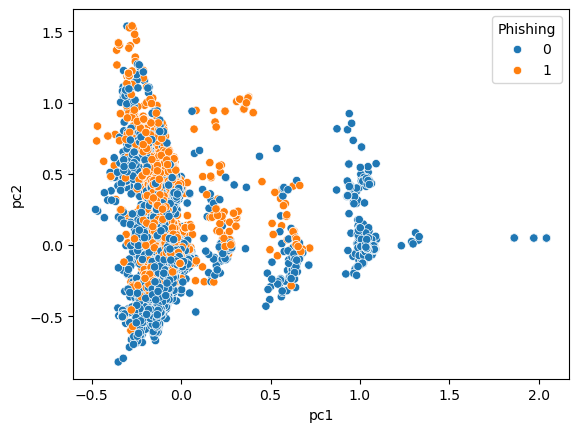

In [10]:
import seaborn as sns
gdf = pd.DataFrame({'pc1':pc1, 
                    'pc2':pc2,
                    'Phishing': y.reset_index(drop=True)})

# If you have a category column for coloring, add it
# Example: assuming you have it in your original gdf

sns.scatterplot(data=gdf,x='pc1', y='pc2',hue='Phishing')
plt.show()

# More of the data is concentrated to the lower end of the x-axis for pc1. Also, most of the Phishing(1) dots are on the lower end of the x-axis.

In [14]:

pca = PCA(n_components = 2610) # Create PCA instance
pca=pca.fit(X_train) # Create the decomposition
X_pca_test = pca.transform(X_test)
X_pca_train=pca.transform(X_train)
model=LinearRegression()
model.fit(X_pca_train, y_train)
R2=model.score(X_pca_train, y_train)
r2=model.score(X_pca_test, y_test)
print("Train R2:", R2)
print("Test R2:", r2)

# These R2 are stronger than our previous R2. This shows that pca is helpful.

Train R2: 0.766896761127783
Test R2: 0.6613559301353327


In [ ]:
# Q5

# In this high dimensional data, it reduces the number of features, making it easier to visualize while still retaining a lot of information. This also allows us to not have too many feautures to fit, so we avoid overfitting our data. Further, less features leads to faster time for the computer to work with our data.

#https://medium.com/@wilbossoftwarejourney/when-and-why-to-use-pca-advantages-and-downsides-b81a9144696b